1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
interpret the results.

In [96]:
import numpy as np
from scipy.stats import norm

sample = [12, 15, 14, 10, 13, 15, 14, 13, 11, 12, 14, 13]
sample_mean = np.mean(sample)
sample_size = len(sample)

population_mean = 10
population_std = 2

z = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

p_value = 2 * (1 - norm.cdf(np.abs(z)))

alpha = 0.05

if p_value < alpha:
    result = "Reject the null hypothesis. There is a significant difference between the sample mean and the population mean."
else:
    result = "Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean."

print(f"Sample Mean: {sample_mean}")
print(f"Population Mean: {population_mean}")
print(f"Population Standard Deviation: {population_std}")
print(f"Z-score: {z}")
print(f"P-value: {p_value}")
print(result)


Sample Mean: 13.0
Population Mean: 10
Population Standard Deviation: 2
Z-score: 5.196152422706631
P-value: 2.0345546136724124e-07
Reject the null hypothesis. There is a significant difference between the sample mean and the population mean.


2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.


In [97]:
from scipy import stats

np.random.seed(0)
data1 = np.random.normal(loc=10, scale=2, size=100)
data2 = np.random.normal(loc=12, scale=2, size=100)

t_stat, p_value = stats.ttest_ind(data1, data2)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -7.0414273690132765
p-value: 3.059820094513985e-11


3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

In [98]:

np.random.seed(0)
sample_data = np.random.normal(loc=10, scale=2, size=100)

population_mean = 10
population_std = 2

sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))

print("Z-statistic:", z_stat)
print("p-value:", p_value)


Z-statistic: 0.5980801553448511
p-value: 0.549786450862416


4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

Sample 1 Mean: 21.5, Sample 2 Mean: 31.5
Z Statistic: -8.09776330178916
P-Value: 6.661338147750939e-16
Reject the null hypothesis: There is a significant difference between the two sample means.


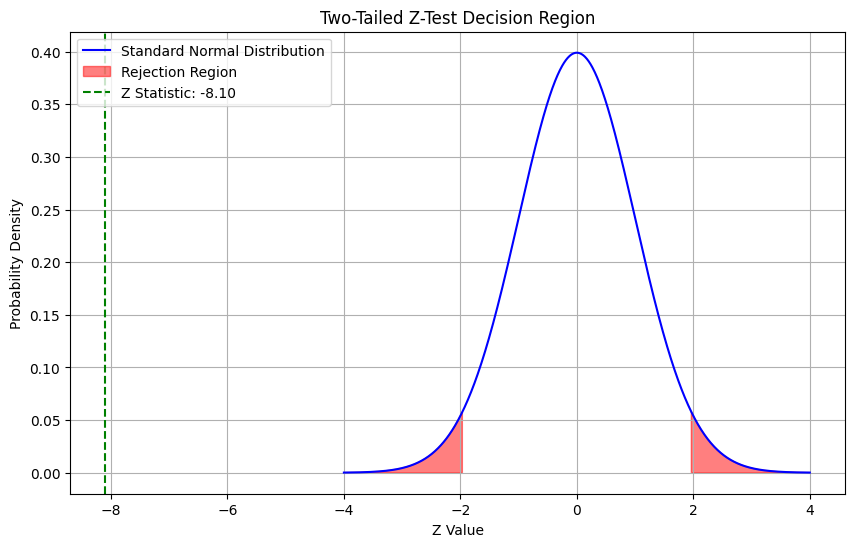

In [99]:
import matplotlib.pyplot as plt

sample1 = [20, 22, 19, 24, 23, 21, 20, 22, 19, 25]
sample2 = [30, 32, 29, 34, 33, 31, 30, 32, 29, 35]

std1 = 2.5
std2 = 3.0

mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
n1 = len(sample1)
n2 = len(sample2)

z_statistic = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Sample 1 Mean: {mean1}, Sample 2 Mean: {mean2}")
print(f"Z Statistic: {z_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two sample means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two sample means.")

z_values = np.linspace(-4, 4, 1000)

p_values = stats.norm.pdf(z_values)

plt.figure(figsize=(10, 6))
plt.plot(z_values, p_values, label='Standard Normal Distribution', color='blue')

plt.fill_between(z_values, p_values, where=(z_values < -stats.norm.ppf(1 - alpha/2)) | (z_values > stats.norm.ppf(1 - alpha/2)),
                 color='red', alpha=0.5, label='Rejection Region')

plt.axvline(z_statistic, color='green', linestyle='--', label=f'Z Statistic: {z_statistic:.2f}')

plt.title('Two-Tailed Z-Test Decision Region')
plt.xlabel('Z Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

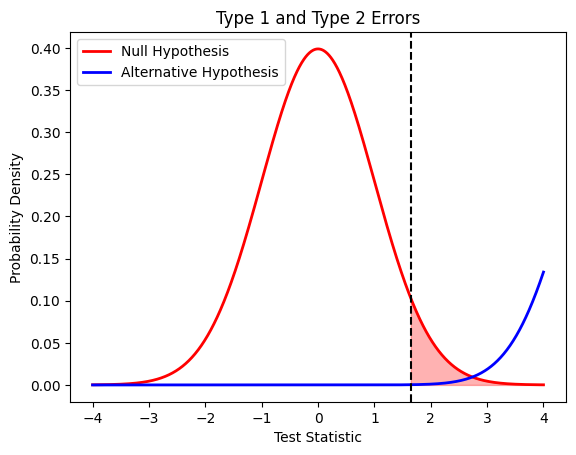

Type 1 Error: 0.050000000000000044
Type 2 Error: 6.345683143388617e-05


In [100]:
def hypothesis_test(n, alpha, true_mean, test_mean, sigma):
    sample_data = np.random.normal(true_mean, sigma, n)

    test_statistic = (np.mean(sample_data) - test_mean) / (sigma / np.sqrt(n))

    critical_value = norm.ppf(1 - alpha)

    type_1_error = norm.cdf(-critical_value)

    z = (test_mean - true_mean) / (sigma / np.sqrt(n))
    type_2_error = norm.cdf(critical_value - z)

    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label='Null Hypothesis')
    plt.plot(x, norm.pdf(x, z, 1), 'b-', lw=2, label='Alternative Hypothesis')
    plt.fill_between(x, 0, norm.pdf(x, 0, 1), where=(x > critical_value), color='red', alpha=0.3)
    plt.fill_between(x, 0, norm.pdf(x, z, 1), where=(x < critical_value), color='blue', alpha=0.3)
    plt.axvline(x=critical_value, color='k', linestyle='--')
    plt.xlabel('Test Statistic')
    plt.ylabel('Probability Density')
    plt.title('Type 1 and Type 2 Errors')
    plt.legend()
    plt.show()

    return type_1_error, type_2_error

n = 30
alpha = 0.05
true_mean = 0
test_mean = 1
sigma = 1

type_1_error, type_2_error = hypothesis_test(n, alpha, true_mean, test_mean, sigma)
print(f"Type 1 Error: {type_1_error}")
print(f"Type 2 Error: {type_2_error}")


6. Write a Python program to perform an independent T-test and interpret the results.

In [101]:
from scipy.stats import ttest_ind

group1 = np.array([20, 22, 19, 21, 18, 23, 20, 21])
group2 = np.array([30, 28, 29, 27, 31, 30, 29, 28])

t_stat, p_value = ttest_ind(group1, group2)

alpha = 0.05
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the two groups.")


t-statistic: -11.613
p-value: 0.000
We reject the null hypothesis. There is a significant difference between the two groups.


7. Perform a paired sample T-test using Python and visualize the comparison results.

t-statistic: -6.619
p-value: 0.000
We reject the null hypothesis. There is a significant difference between the before and after measurements.


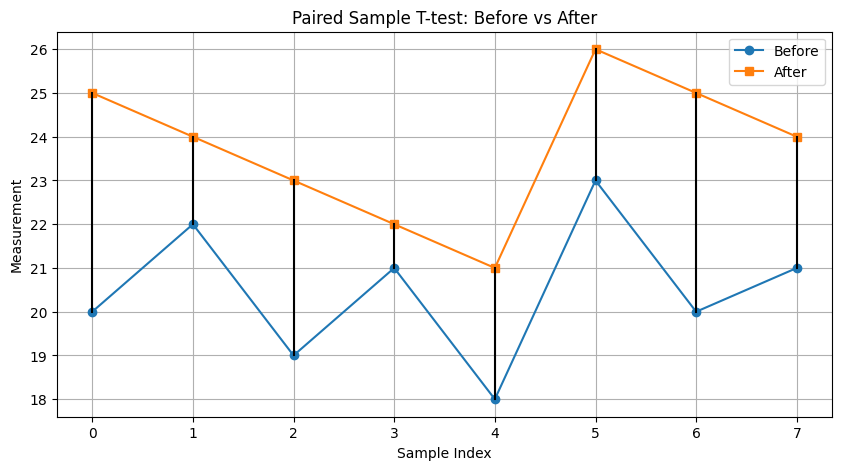

In [102]:
from scipy.stats import ttest_rel

before = np.array([20, 22, 19, 21, 18, 23, 20, 21])
after = np.array([25, 24, 23, 22, 21, 26, 25, 24])

t_stat, p_value = ttest_rel(before, after)

alpha = 0.05
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the before and after measurements.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the before and after measurements.")

plt.figure(figsize=(10, 5))
plt.plot(before, 'o-', label='Before')
plt.plot(after, 's-', label='After')
for i in range(len(before)):
    plt.plot([i, i], [before[i], after[i]], 'k-')
plt.xlabel('Sample Index')
plt.ylabel('Measurement')
plt.title('Paired Sample T-test: Before vs After')
plt.legend()
plt.grid(True)
plt.show()


8. Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [103]:
def simulate_data(mean, std_dev, n):
   return np.random.normal(mean, std_dev, n)

def perform_z_test(data, population_mean):

    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=0)
    n = len(data)

    z_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

    return z_statistic, p_value

def perform_t_test(data, population_mean):

    t_statistic, p_value = stats.ttest_1samp(data, population_mean)
    return t_statistic, p_value

mean = 100
std_dev = 15
n = 30
population_mean = 105

data = simulate_data(mean, std_dev, n)

z_statistic, z_p_value = perform_z_test(data, population_mean)

t_statistic, t_p_value = perform_t_test(data, population_mean)

print("Z-test results:")
print(f"Z-statistic: {z_statistic:.4f}, P-value: {z_p_value:.4f}")

print("\nT-test results:")
print(f"T-statistic: {t_statistic:.4f}, P-value: {t_p_value:.4f}")

alpha = 0.05
print("\nInterpretation:")
if z_p_value < alpha:
    print("Z-test: Reject the null hypothesis.")
else:
    print("Z-test: Fail to reject the null hypothesis.")

if t_p_value < alpha:
    print("T-test: Reject the null hypothesis.")
else:
    print("T-test: Fail to reject the null hypothesis.")

Z-test results:
Z-statistic: -2.3384, P-value: 0.0194

T-test results:
T-statistic: -2.2991, P-value: 0.0289

Interpretation:
Z-test: Reject the null hypothesis.
T-test: Reject the null hypothesis.


9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [104]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    h = stderr * stats.t.ppf((1 + confidence) / 2, n - 1)

    return mean, mean - h, mean + h

data = [10, 12, 15, 14, 13, 16, 17, 11, 14, 13]
mean, lower_bound, upper_bound = confidence_interval(data)
print(f"Sample Mean: {mean:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


Sample Mean: 13.50
95% Confidence Interval: (11.95, 15.05)


10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [105]:
def margin_of_error(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    h = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)

    return h

data = [10, 12, 15, 14, 13, 16, 17, 11, 14, 13]
confidence = 0.95
moe = margin_of_error(data, confidence)
print(f"Margin of Error: {moe:.2f} for a {confidence*100:.0f}% confidence level")


Margin of Error: 1.55 for a 95% confidence level


11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

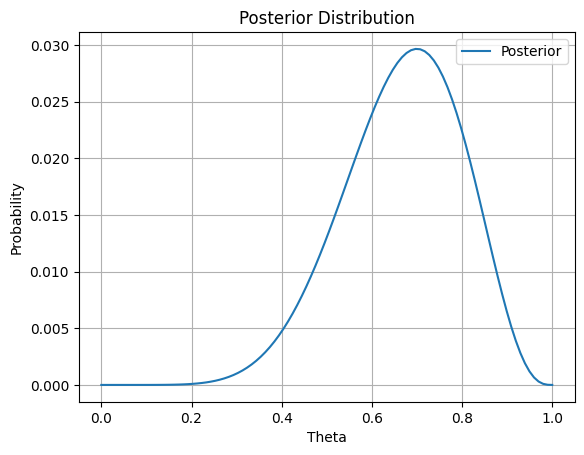

In [106]:
def prior_probability(theta):
    if 0 <= theta <= 1:
        return 1
    else:
        return 0

def likelihood(theta, data):
    heads = np.sum(data == 1)
    tails = np.sum(data == 0)
    return theta**heads * (1 - theta)**tails

def posterior_probability(theta, data):
    return likelihood(theta, data) * prior_probability(theta)

data = np.array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

theta_values = np.linspace(0, 1, 100)
posterior_values = np.array([posterior_probability(theta, data) for theta in theta_values])

posterior_values /= np.sum(posterior_values)

plt.plot(theta_values, posterior_values, label='Posterior')
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.title('Posterior Distribution')
plt.legend()
plt.grid(True)
plt.show()


12. Perform a Chi-square test for independence between two categorical variables in Python.

In [107]:
import pandas as pd

data = {'Category1': ['A', 'A', 'B', 'B', 'C', 'C', 'C', 'A', 'B', 'A'],
        'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']}

df = pd.DataFrame(data)

contingency_table = pd.crosstab(df['Category1'], df['Category2'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between the two categorical variables.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between the two categorical variables.")


Contingency Table:
Category2  X  Y
Category1      
A          1  3
B          2  1
C          2  1

Chi-square Statistic: 1.667
P-value: 0.435
Degrees of Freedom: 2
Expected Frequencies:
[[2.  2. ]
 [1.5 1.5]
 [1.5 1.5]]

We fail to reject the null hypothesis. There is no significant association between the two categorical variables.


13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed
data.

In [108]:
def calculate_expected_frequencies(observed):
    # Get the row and column sums
    row_sums = observed.sum(axis=1)
    col_sums = observed.sum(axis=0)
    total = observed.sum().sum()

    expected = np.outer(row_sums, col_sums) / total
    return expected

data = {'Category1': ['A', 'A', 'B', 'B', 'C', 'C', 'C', 'A', 'B', 'A'],
        'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']}

df = pd.DataFrame(data)

observed = pd.crosstab(df['Category1'], df['Category2'])

print("Observed Frequencies:")
print(observed)

expected = calculate_expected_frequencies(observed)

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))

chi2, p, dof, expected_scipy = stats.chi2_contingency(observed)
print("\nExpected Frequencies (scipy.stats):")
print(pd.DataFrame(expected_scipy, index=observed.index, columns=observed.columns))


Observed Frequencies:
Category2  X  Y
Category1      
A          1  3
B          2  1
C          2  1

Expected Frequencies:
Category2    X    Y
Category1          
A          2.0  2.0
B          1.5  1.5
C          1.5  1.5

Expected Frequencies (scipy.stats):
Category2    X    Y
Category1          
A          2.0  2.0
B          1.5  1.5
C          1.5  1.5


14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [109]:
observed = np.array([50, 30, 20])

total_observations = observed.sum()
expected_probabilities = np.array([0.4, 0.4, 0.2])
expected = expected_probabilities * total_observations

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

alpha = 0.05
print(f"Chi-square Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. The observed data does not fit the expected distribution.")
else:
    print("We fail to reject the null hypothesis. The observed data fits the expected distribution.")


Chi-square Statistic: 5.000
P-value: 0.082
We fail to reject the null hypothesis. The observed data fits the expected distribution.


15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

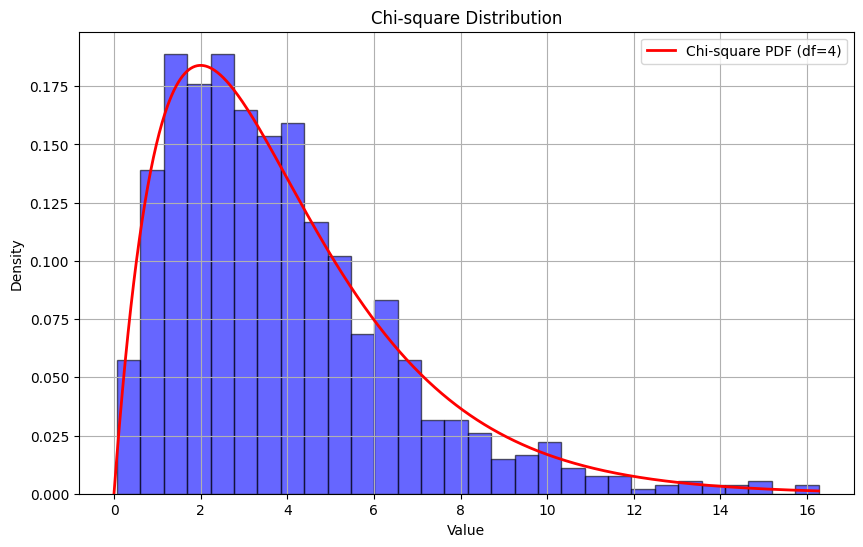

In [110]:
df = 4
size = 1000

chi_square_samples = np.random.chisquare(df, size)

plt.figure(figsize=(10, 6))
plt.hist(chi_square_samples, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

x = np.linspace(0, max(chi_square_samples), 1000)
plt.plot(x, stats.chi2.pdf(x, df), 'r-', lw=2, label=f'Chi-square PDF (df={df})')

plt.title('Chi-square Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


16. Implement an F-test using Python to compare the variances of two random samples.


In [111]:
np.random.seed(42)
sample1 = np.random.normal(loc=20, scale=5, size=100)
sample2 = np.random.normal(loc=20, scale=7, size=100)

var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

f_statistic = var1 / var2
df1 = len(sample1) - 1
df2 = len(sample2) - 1
p_value = stats.f.cdf(f_statistic, df1, df2)

if f_statistic > 1:
    p_value = 1 - p_value

alpha = 0.05
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. The variances of the two samples are significantly different.")
else:
    print("We fail to reject the null hypothesis. The variances of the two samples are not significantly different.")


F-statistic: 0.463
P-value: 0.000
We reject the null hypothesis. The variances of the two samples are significantly different.


17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.

In [112]:
group1 = np.array([20, 21, 22, 23, 24])
group2 = np.array([25, 26, 27, 28, 29])
group3 = np.array([30, 31, 32, 33, 34])

f_statistic, p_value = stats.f_oneway(group1, group2, group3)

alpha = 0.05
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the group means.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the group means.")


F-statistic: 50.000
P-value: 0.000
We reject the null hypothesis. There is a significant difference between the group means.


18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

F-statistic: 50.000
P-value: 0.000
We reject the null hypothesis. There is a significant difference between the group means.


<ipython-input-113-4d711d500954>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])


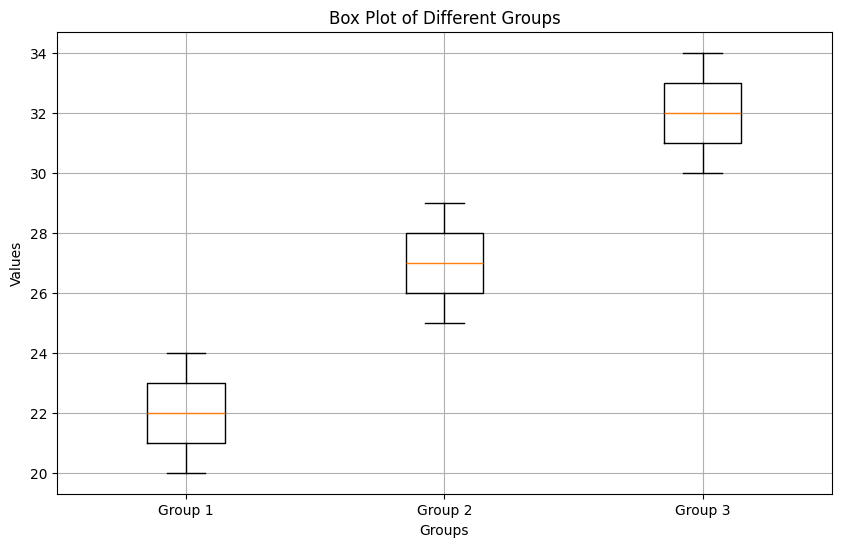

In [113]:
group1 = np.array([20, 21, 22, 23, 24])
group2 = np.array([25, 26, 27, 28, 29])
group3 = np.array([30, 31, 32, 33, 34])

f_statistic, p_value = stats.f_oneway(group1, group2, group3)

alpha = 0.05
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the group means.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the group means.")

plt.figure(figsize=(10, 6))
plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot of Different Groups')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.grid(True)
plt.show()


19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA

Shapiro-Wilk test for normality: W=0.964, p-value=0.755
The data is normally distributed (fail to reject H0).
Levene's test for equal variances: W=0.000, p-value=1.000
The variances are equal (fail to reject H0).


<ipython-input-114-879b63ffe26f>:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f'Group {i+1}' for i in range(len(data))])


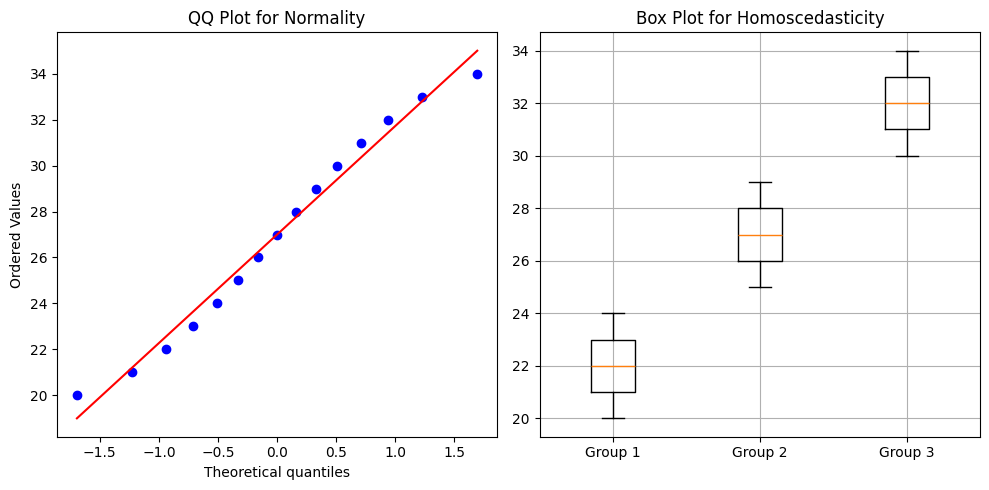

In [114]:
import seaborn as sns

def check_anova_assumptions(data):
    flattened_data = [item for sublist in data for item in sublist]

    stat, p_value = stats.shapiro(flattened_data)
    print(f"Shapiro-Wilk test for normality: W={stat:.3f}, p-value={p_value:.3f}")
    if p_value > 0.05:
        print("The data is normally distributed (fail to reject H0).")
    else:
        print("The data is not normally distributed (reject H0).")

    stat, p_value = stats.levene(*data)
    print(f"Levene's test for equal variances: W={stat:.3f}, p-value={p_value:.3f}")
    if p_value > 0.05:
        print("The variances are equal (fail to reject H0).")
    else:
        print("The variances are not equal (reject H0).")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    stats.probplot(flattened_data, dist="norm", plot=plt)
    plt.title('QQ Plot for Normality')

    plt.subplot(1, 2, 2)
    plt.boxplot(data, labels=[f'Group {i+1}' for i in range(len(data))])
    plt.title('Box Plot for Homoscedasticity')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

group1 = np.array([20, 21, 22, 23, 24])
group2 = np.array([25, 26, 27, 28, 29])
group3 = np.array([30, 31, 32, 33, 34])
data = [group1, group2, group3]

check_anova_assumptions(data)


20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the
results.

                            sum_sq     df           F        PR(>F)
C(Factor1)             1267.232469    1.0  349.847919  1.676547e-43
C(Factor2)             1270.184815    2.0  175.331490  1.986954e-42
C(Factor1):C(Factor2)     1.742730    2.0    0.240560  7.864487e-01
Residual                630.269434  174.0         NaN           NaN


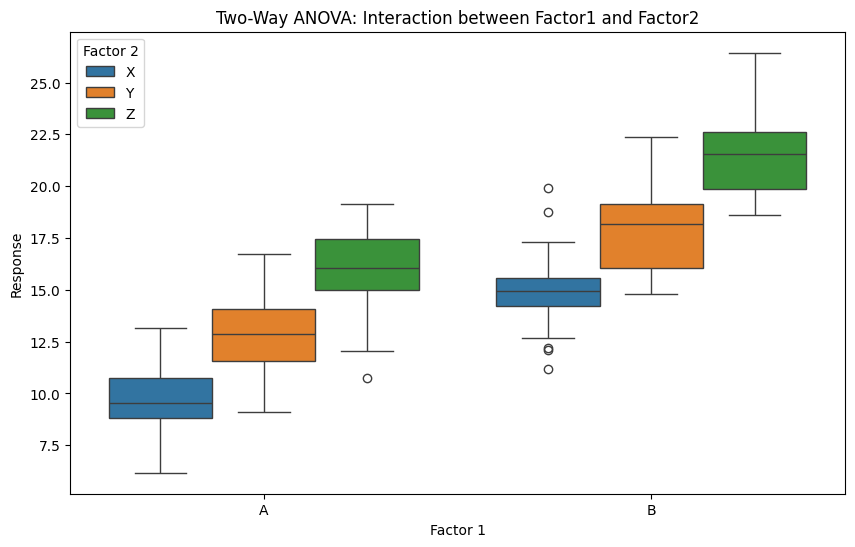

In [115]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(42)

n = 30
factor1_levels = ['A', 'B']
factor2_levels = ['X', 'Y', 'Z']

data = []

for f1 in factor1_levels:
    for f2 in factor2_levels:
        mean = 10 + (ord(f1) - ord('A')) * 5 + (ord(f2) - ord('X')) * 3
        std_dev = 2
        group_data = np.random.normal(mean, std_dev, n)
        data.extend(zip([f1] * n, [f2] * n, group_data))

df = pd.DataFrame(data, columns=['Factor1', 'Factor2', 'Response'])

model = ols('Response ~ C(Factor1) * C(Factor2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Factor1', y='Response', hue='Factor2', data=df)
plt.title('Two-Way ANOVA: Interaction between Factor1 and Factor2')
plt.xlabel('Factor 1')
plt.ylabel('Response')
plt.legend(title='Factor 2')
plt.show()

21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testingD

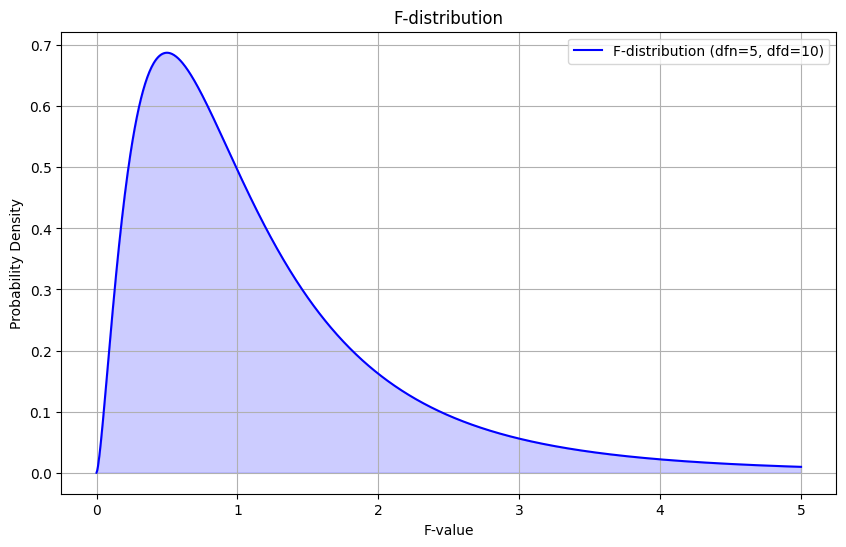

In [116]:

dfn = 5
dfd = 10
x = np.linspace(0, 5, 1000)

f_pdf = stats.f.pdf(x, dfn, dfd)

plt.figure(figsize=(10, 6))
plt.plot(x, f_pdf, 'b-', label=f'F-distribution (dfn={dfn}, dfd={dfd})')
plt.fill_between(x, f_pdf, alpha=0.2, color='blue')
plt.title('F-distribution')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

F-statistic: 50.000
P-value: 0.000
We reject the null hypothesis. There is a significant difference between the group means.


<ipython-input-117-4d711d500954>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])


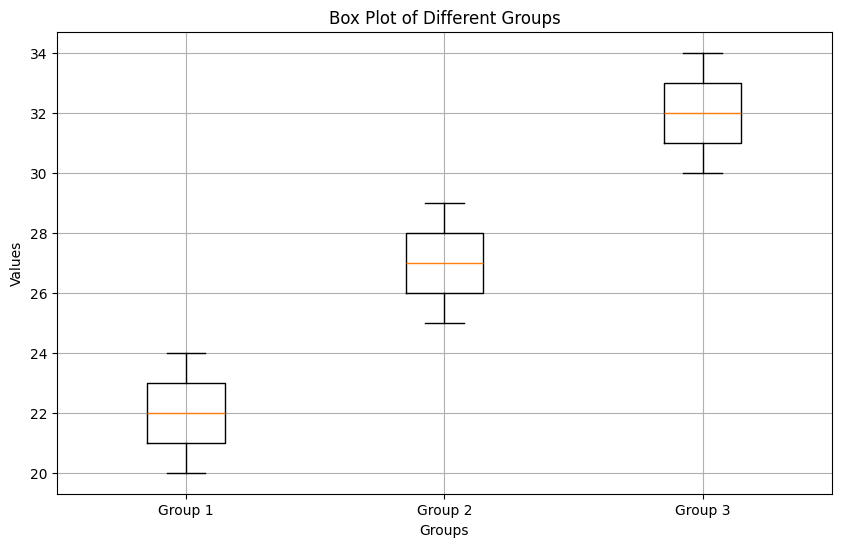

In [117]:
group1 = np.array([20, 21, 22, 23, 24])
group2 = np.array([25, 26, 27, 28, 29])
group3 = np.array([30, 31, 32, 33, 34])

f_statistic, p_value = stats.f_oneway(group1, group2, group3)

alpha = 0.05
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the group means.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the group means.")

plt.figure(figsize=(10, 6))
plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot of Different Groups')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.grid(True)
plt.show()


23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

T-statistic: -4.316
P-value: 0.000
We reject the null hypothesis. There is a significant difference between the means of the two samples.


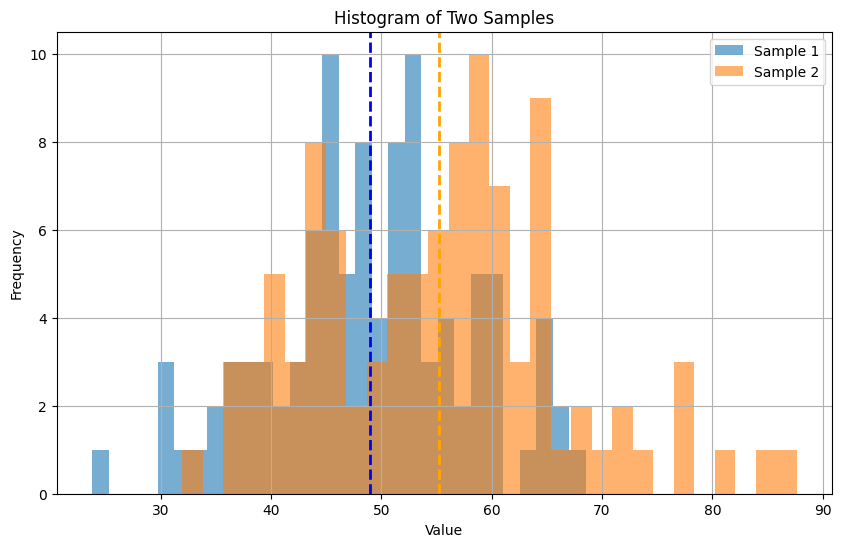

In [118]:
mean1 = 50
std1 = 10
mean2 = 55
std2 = 12
sample_size = 100

np.random.seed(42)
sample1 = np.random.normal(mean1, std1, sample_size)
sample2 = np.random.normal(mean2, std2, sample_size)

t_statistic, p_value = stats.ttest_ind(sample1, sample2)

alpha = 0.05
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the means of the two samples.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the means of the two samples.")

plt.figure(figsize=(10, 6))
plt.hist(sample1, bins=30, alpha=0.6, label='Sample 1')
plt.hist(sample2, bins=30, alpha=0.6, label='Sample 2')
plt.axvline(np.mean(sample1), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(sample2), color='orange', linestyle='dashed', linewidth=2)
plt.legend()
plt.title('Histogram of Two Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


24.  Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.

In [119]:
np.random.seed(42)
sample = np.random.normal(50, 10, 30)

sigma_0_squared = 100

n = len(sample)
sample_variance = np.var(sample, ddof=1)

chi2_statistic = (n - 1) * sample_variance / sigma_0_squared

df = n - 1

alpha = 0.05
chi2_critical_lower = stats.chi2.ppf(alpha / 2, df)
chi2_critical_upper = stats.chi2.ppf(1 - alpha / 2, df)

p_value = 2 * min(1 - stats.chi2.cdf(chi2_statistic, df), stats.chi2.cdf(chi2_statistic, df))

print(f"Chi-square Statistic: {chi2_statistic:.3f}")
print(f"Degrees of Freedom: {df}")
print(f"Critical Values: [{chi2_critical_lower:.3f}, {chi2_critical_upper:.3f}]")
print(f"P-value: {p_value:.3f}")

if chi2_statistic < chi2_critical_lower or chi2_statistic > chi2_critical_upper:
    print("We reject the null hypothesis. The population variance is significantly different from the hypothesized value.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the population variance and the hypothesized value.")


Chi-square Statistic: 23.490
Degrees of Freedom: 29
Critical Values: [16.047, 45.722]
P-value: 0.493
We fail to reject the null hypothesis. There is no significant difference between the population variance and the hypothesized value.


25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [120]:

successes1 = 60
n1 = 100
successes2 = 45
n2 = 80

p1 = successes1 / n1
p2 = successes2 / n2

p_pooled = (successes1 + successes2) / (n1 + n2)

z_statistic = (p1 - p2) / np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))

p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

alpha = 0.05
print(f"Z-statistic: {z_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the proportions of the two groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the proportions of the two groups.")


Z-statistic: 0.507
P-value: 0.612
We fail to reject the null hypothesis. There is no significant difference between the proportions of the two groups.


26. D Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

F-statistic: 0.415
P-value: 0.010
We reject the null hypothesis. The variances of the two samples are significantly different.


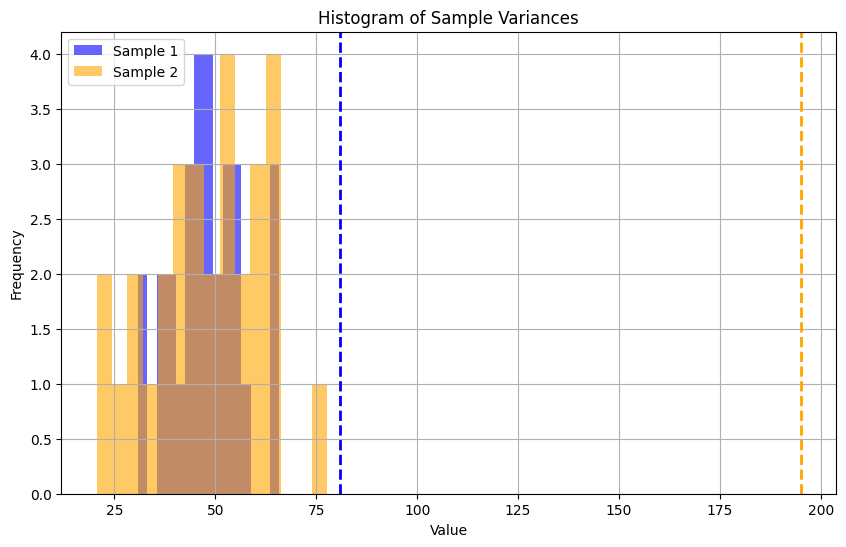

In [121]:
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)
sample2 = np.random.normal(loc=50, scale=15, size=30)

var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

f_statistic = var1 / var2
df1 = len(sample1) - 1
df2 = len(sample2) - 1
p_value = stats.f.cdf(f_statistic, df1, df2)

if f_statistic > 1:
    p_value = 1 - p_value

alpha = 0.05
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. The variances of the two samples are significantly different.")
else:
    print("We fail to reject the null hypothesis. The variances of the two samples are not significantly different.")

plt.figure(figsize=(10, 6))
plt.hist(sample1, bins=15, alpha=0.6, label='Sample 1', color='blue')
plt.hist(sample2, bins=15, alpha=0.6, label='Sample 2', color='orange')
plt.axvline(np.var(sample1, ddof=1), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.var(sample2, ddof=1), color='orange', linestyle='dashed', linewidth=2)
plt.legend()
plt.title('Histogram of Sample Variances')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

In [122]:
observed_frequencies = np.array([30, 25, 20, 15, 10])

expected_frequencies = np.array([20, 20, 20, 20, 20])

chi2_statistic, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

alpha = 0.05
print(f"Chi-square Statistic: {chi2_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("We reject the null hypothesis. The observed data does not fit the expected distribution.")
else:
    print("We fail to reject the null hypothesis. The observed data fits the expected distribution.")


Chi-square Statistic: 12.500
P-value: 0.014
We reject the null hypothesis. The observed data does not fit the expected distribution.
